In [1]:
from diedfunctions import *

# Visualise
import warnings
# warnings.filterwarnings('ignore')
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

C:\Users\diede\Personal Files [Local]\Applied Data Science\Thesis - CITYNET\venv_citynet3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
NEWDIR = "../../../../data/enwiki_city_pairs_lemmatised/VERBNOUNADJ_SPACY_LARGE_REAL_WORDS"

In [3]:
import os
import pickle

word_list_location = NEWDIR
wordlists = []
city_pairs = []
for file in os.scandir(word_list_location):
    with open(file.path, 'rb') as fp:
        wordlists.append(pickle.load(fp))
        city_pairs.append(file.name.split('__')[1])

In [4]:
len(wordlists), city_pairs

(10,
 ['berlin_milan',
  'london_berlin',
  'london_madrid',
  'london_milan',
  'madrid_berlin',
  'madrid_milan',
  'paris_berlin',
  'paris_london',
  'paris_madrid',
  'paris_milan'])

In [41]:
import os
os.path.basename(os.getcwd())

fs = os.listdir(os.getcwd())

for ff in fs:
    if ff.endswith('py'):
        print(ff.path)

AttributeError: 'str' object has no attribute 'path'

In [5]:
dictionary, corpus = vectorize(wordlists, filter_extremes=True, MIN_DF=0.2, MAX_DF=0.9)

In [6]:
%%time
N_TOPICS = 10
lda_model, coherence_score, dictionary, corpus = train_lda_model(wordlists, dictionary, corpus, N_TOPICS=N_TOPICS)

CPU times: total: 1.67 s
Wall time: 1min 16s


In [21]:
coherence_score = CoherenceModel(model=lda_model, texts=wordlists, dictionary=dictionary, coherence='c_v').get_coherence()
round(coherence_score, 2)

0.52

# Visualisation

In [9]:
warnings.filterwarnings('ignore')
pyLDAvis.enable_notebook()

lda_conv = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_model) # my_models[0]['lda_model__2']['model']
vis = gensimvis.prepare(lda_conv, corpus, dictionary)


# topic number by size!
N_TOPICS = 10

In [10]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.187266 -0.004042       1        1  48.964442
1      0.168535 -0.008558       2        1  27.811941
5      0.152575 -0.002388       3        1   6.503630
3      0.126291  0.042209       4        1   4.837879
8      0.179910  0.001016       5        1   3.609076
9     -0.157990  0.015768       6        1   2.380340
6     -0.097837 -0.057923       7        1   1.857814
2     -0.165284  0.209420       8        1   1.451795
4     -0.215499  0.167981       9        1   1.361543
0     -0.177967 -0.363483      10        1   1.221537, topic_info=              Term        Freq       Total Category  logprob  loglift
1428      marathon  712.000000  712.000000  Default  30.0000  30.0000
4527   consecutive  255.000000  255.000000  Default  29.0000  29.0000
2070        runway  345.000000  345.000000  Default  28.0000  28.0000
12484        vogue  355.000000  355.000000  Default  27.0000  27.0000
1894      prussian  504.000000  504.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
9919         ratio    6.414964   15.568307  Topic10  -6.4493   3.5185
4346      collapse    9.164234  200.063086  Topic10  -6.0927   1.3217
11146       sprint    7.331387   84.329037  Topic10  -6.3158   1.9625
253        bicycle    6.414964   96.746049  Topic10  -6.4493   1.6916
5964      fatality    6.414964   22.596139  Topic10  -6.4493   3.1459

[986 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
18601      6  1.042400         aas
18602      6  1.042400       abash
2657      10  1.091199        abba
18606      8  1.084707   abernethy
2666      10  1.091199  aberration
...      ...       ...         ...
12780      4  0.004362        zone
12780      5  0.039258        zone
2648       1  0.024941         zoo
2648       2  0.964377         zoo
2648       7  0.008314         zoo

[1774 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 6, 4, 9, 10, 7, 3, 5, 1])

In [18]:
pyLDAvis.save_html(vis, 'lda.html')

In [31]:
from IPython.display import HTML
def test():
    return HTML(filename='lda.html')

In [69]:
y = range(0, 10, 2)

if isinstance(y, range):
    print('yes')

yes


In [81]:
#gensim.corpora.MmCorpus.serialize('mycorpus', corpus)

c = gensim.corpora.MmCorpus('mycorpus')
c

In [73]:
x = list(range(2, 20, 3))

print(f"{[i for i in x]}")

[2, 5, 8, 11, 14, 17]


In [33]:
a = test()

In [49]:
#dictionary.save('lda_dict.dict')
d=Dictionary.load('lda_dict.dict')
d
#corpus = [d.doc2bow(text) for text in wordlists]
d.token2id

{'abate': 0,
 'abbreviate': 1,
 'abend': 2,
 'abound': 3,
 'abscess': 4,
 'abstain': 5,
 'abstract': 6,
 'academia': 7,
 'acceptance': 8,
 'accessible': 9,
 'accessory': 10,
 'acclaimed': 11,
 'accompaniment': 12,
 'accompanist': 13,
 'accomplish': 14,
 'accomplished': 15,
 'accountant': 16,
 'accurate': 17,
 'acid': 18,
 'acis': 19,
 'acknowledge': 20,
 'acknowledgment': 21,
 'acne': 22,
 'acquaint': 23,
 'acquaintance': 24,
 'acrimonious': 25,
 'actual': 26,
 'acute': 27,
 'adjacent': 28,
 'administer': 29,
 'administrative': 30,
 'administrator': 31,
 'admire': 32,
 'admired': 33,
 'adopter': 34,
 'adultery': 35,
 'advent': 36,
 'advertisement': 37,
 'advocate': 38,
 'aerial': 39,
 'affirm': 40,
 'affordable': 41,
 'aforementioned': 42,
 'afraid': 43,
 'aftermath': 44,
 'afternoon': 45,
 'agamemnon': 46,
 'aggressive': 47,
 'agitate': 48,
 'agitation': 49,
 'agrarian': 50,
 'agricultural': 51,
 'agriculture': 52,
 'aide': 53,
 'airfield': 54,
 'airplay': 55,
 'ajax': 56,
 'albanian'

# Word topic distribution

In [8]:
MAX_WORDS = 8

for i in range(N_TOPICS):
    topic_words = lda_model.show_topic(i, topn=MAX_WORDS)
    print(i, [(x[0], round(x[1], 3)) for x in topic_words])

0 [('prey', 0.006), ('breaststroke', 0.006), ('archaeopteryx', 0.003), ('altarpiece', 0.003), ('airlift', 0.003), ('owl', 0.002), ('moulage', 0.002), ('collapse', 0.002)]
1 [('marathon', 0.008), ('prussian', 0.005), ('faculty', 0.005), ('violin', 0.004), ('east', 0.004), ('fellowship', 0.003), ('specimen', 0.003), ('socialist', 0.003)]
2 [('anime', 0.003), ('barn', 0.003), ('haute', 0.003), ('midwife', 0.002), ('wardrobe', 0.002), ('fountain', 0.002), ('wafd', 0.002), ('lorry', 0.002)]
3 [('semifinal', 0.007), ('republican', 0.006), ('quarterfinal', 0.005), ('seed', 0.004), ('slam', 0.004), ('terrorist', 0.004), ('cuban', 0.004), ('basque', 0.003)]
4 [('drape', 0.003), ('crazy', 0.003), ('watercolourist', 0.002), ('statuette', 0.002), ('midwife', 0.002), ('bankside', 0.002), ('berwick', 0.002), ('spitfire', 0.002)]
5 [('runway', 0.012), ('vogue', 0.009), ('modeling', 0.006), ('boutique', 0.006), ('serbian', 0.006), ('rider', 0.006), ('arcade', 0.005), ('couture', 0.005)]
6 [('gymnasium

# Document topic distribution

In [29]:
import pandas as pd

transformed_docs = lda_model.load_document_topics()
topic_distributions = pd.DataFrame([[x[1] for x in doc] for doc in transformed_docs], 
             columns=['topic_{}'.format(i) for i in range(10)])
topic_distributions['city_pairs'] = city_pairs
topic_distributions.set_index("city_pairs", inplace=True)
topic_distributions

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
city_pairs,,,,,,,,,,
berlin_milan,0.000008,0.348278,0.000004,0.000065,0.000004,0.350113,0.000015,0.261110,0.040400,0.000004
london_berlin,0.083499,0.482358,0.015152,0.009166,0.013227,0.387564,0.009034,NaN,NaN,NaN
london_madrid,0.000002,0.194084,0.000001,0.276749,0.000001,0.000020,0.000005,0.427600,0.101538,0.000001
london_milan,0.000002,0.107554,0.000001,0.000020,0.000001,0.395662,0.000005,0.431460,0.065292,0.000001
madrid_berlin,0.000007,0.411699,0.000003,0.321443,0.000003,0.000053,0.000013,0.224306,0.042470,0.000003
madrid_milan,0.000007,0.002777,0.000003,0.000863,0.000003,0.000053,0.000013,0.179190,0.817088,0.000003
paris_berlin,0.443380,0.023746,0.017946,0.099278,0.410156,0.005493,NaN,NaN,NaN,NaN
paris_london,0.001938,0.210302,0.034110,0.024047,0.032466,0.041451,0.006184,0.588465,0.007291,0.053745
paris_madrid,0.000002,0.166257,0.274960,0.000014,0.000003,0.437061,0.121702,NaN,NaN,NaN


# Topic Coverage Distribution

In [27]:
distribution = topic_distributions.mean().sort_values(ascending=False)
sorted_distribution = distribution.sort_index()
distribution

topic_7    0.352022
topic_1    0.205196
topic_5    0.203376
topic_8    0.179013
topic_3    0.113268
topic_0    0.052885
topic_4    0.045587
topic_2    0.034231
topic_6    0.023845
topic_9    0.008960
dtype: float64

0.12183824496165012


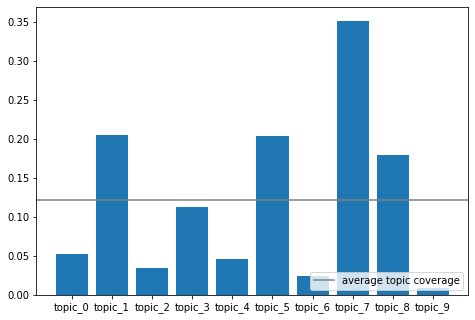

In [23]:
distribution = topic_distributions.mean().sort_values(ascending=False)
sorted_distribution = distribution.sort_index()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
topics = sorted_distribution.index
coverage = list(sorted_distribution)
ax.bar(topics,coverage)
average_topic_coverage = sum(sorted_distribution)/len(sorted_distribution)
print(average_topic_coverage)
plt.axhline(average_topic_coverage, color='grey', ls='-', label='average topic coverage')
plt.legend(loc='lower right')
plt.show()

In [6]:
keyname= '10citypairs10topics0_2and0_9coherence0_51'
model_path = f'../../../../data/lda_models/{keyname}.model'

# Save Model

In [ ]:
lda_model.save(model_path)

# Load Model

In [7]:
# Load Model
if os.path.exists(model_path):
    lda_model = gensim.models.LdaModel.load(model_path)

In [8]:
lda_model